In [1]:
from helpers.idf_helpers import *
from helpers.plot_helpers import *
from studies import run_study

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, SelectMultiple
from eppy.modeleditor import IDF
from IPython.display import display

import os

In [2]:
outputs = pd.read_excel('Output Variables.xlsx')

In [3]:
import re 
pattern = re.compile('Site ')
Site = [i for i in outputs['Output Name'] if pattern]

In [4]:
temp = outputs[outputs['Units']=='C']

In [5]:
Site

['Site Outdoor Air Drybulb Temperature',
 'Site Outdoor Air Dewpoint Temperature',
 'Site Outdoor Air Wetbulb Temperature',
 'Site Outdoor Air Humidity Ratio',
 'Site Outdoor Air Relative Humidity',
 'Site Outdoor Air Barometric Pressure',
 'Site Wind Speed',
 'Site Wind Direction',
 'Site Sky Temperature',
 'Site Horizontal Infrared Radiation Rate per Area',
 'Site Diffuse Solar Radiation Rate per Area',
 'Site Direct Solar Radiation Rate per Area',
 'Site Precipitation Depth',
 'Site Ground Reflected Solar Radiation Rate per Area',
 'Site Ground Temperature',
 'Site Surface Ground Temperature',
 'Site Deep Ground Temperature',
 'Site Simple Factor Model Ground Temperature',
 'Site Total Sky Cover',
 'Site Opaque Sky Cover',
 'Site Outdoor Air Enthalpy',
 'Site Outdoor Air Density',
 'Site Solar Azimuth Angle',
 'Site Solar Altitude Angle',
 'Site Solar Hour Angle',
 'Site Rain Status',
 'Site Snow on Ground Status',
 'Site Exterior Horizontal Sky Illuminance',
 'Site Exterior Horizon

In [6]:
@interact
def get_output(output = temp['Output Name']):
    return temp[temp['Output Name']==output]

interactive(children=(Dropdown(description='output', options=('Site Outdoor Air Drybulb Temperature', 'Site Ou…

### TODO ESTO SE SACA DEL WEATHER FILE O POR CÁLCULOS DE VARIABLES DE EEATHER FILE

### Weather Data Related Outputs
#### Site Outdoor Air Drybulb Temperature:
Se llama temperatura seca del aire, o más sencillamente temperatura seca, a la del aire, prescindiendo de la radiación calorífica de los objetos que rodean ese ambiente y de los efectos de la humedad relativa y de la velocidad del aire.

####  	Site Outdoor Air Dewpoint Temperature

El punto de rocío o temperatura de rocío es la más alçta temperatura a la que empieza a condensarse el vapor de agua contenido en el aire, produciendo rocío, neblina, cualquier tipo de nube o, en caso de que la temperatura sea lo suficientemente baja, escarcha
The higher the dew point rises, the greater the amount of moisture in the air. This directly affects how "comfortable" it will feel outside.

#### Site Outdoor Air Wetbulb Temperature

El termómetro de bulbo húmedo es un termómetro de mercurio que tiene el bulbo envuelto en un paño de algodón empapado de agua, que se emplea para medir la temperatura húmeda del aire
The adiabatic evaporation of water from the thermometer bulb and the cooling effect is indicated by a "wet bulb temperature" lower than the "dry bulb temperature" in the air.


***mirar: https://www.engineeringtoolbox.com/dry-wet-bulb-dew-point-air-d_682.html****


#### Site Sky Temperature [C]

Ecuacuón de Stefan-Boltzman

#### Site Surface Ground Temperature

Esta variable hay que darla a parte
object:
Site:GroundTemperature:Shallow

#### Site Deep Ground Temperature
Tambien es un input específico del usuario, por mesç


#### Site Outdoor Air Enthalpy [J/kg] , 
Outdoor enthalpy is derived at each timestep from the Site Outdoor Air Drybulb Temperature and
the Site Outdoor Air Humidity Ratio. It is reported in J/kg.
#### Site Outdoor Air Density [kg/m3] 
utdoor air density is derived at each timestep from the Site Outdoor Air Barometric Pressure, the
Outdoor Dry-bulb temperature and the Outdoor Humidity Ratio. It is reported in units kg/m 3 .

#### Site Solar Azimuth Angle [deg]
The Solar Azimuth Angle (f) is measured from the North (clockwise) and is expressed in degrees.
This is shown more clearly in the following figure.

#### Site Solar Altitude Angle [deg]
The Solar Altitude Angle (b) is the angle of the sun above the horizontal (degrees)


#### Site Rain Status [] 
the weather shows “raining”. For a Design Da


#### Snow Status: 
The weather shows “snow on the ground”. For
a Design Day

 
#### Zone Outdoor Air Drybulb/wet/dew Temperature [C]
The outdoor air ... temperature calculated at the height above ground of the zone centroid.

In [7]:
import re
pattern = re.compile('Site')
pattern2 = re.compile('Zone Outdoor')
outside_vars = [i for i in temp['Output Name'] if pattern.search(i)]
outside_vars.append('Zone Outdoor Air Drybulb Temperature')
outside_vars.append('Zone Outdoor Air Wetbulb Temperature')

In [8]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf2 = initialization(idffile, iddfile, epwfile)

In [9]:
@interact
def show_not_null_classes(classes = notnullobj(idf2)):
    return epobject_to_df(idf2.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

#### Simulationontrol:
Do_Zone_Sizing_Calculation Necesita del objejo Sizing:Zone para funcionar
Do_System_Sizing_Calculation Necesita del objejo Sizing:Sytem para funcionar
****En este caso estas dos no tienen sentido xq no voy a hacer un autosize de ningún sistema..m  así que no apolican
#### Building:

...No tengo nada específicado. Quizás debería poner algo más..o no?? xq contra menos variables tenga quizás mejor?

#### SizingPerdiod:Designday
The design day input describes the parameters to effect a “design day” simulation, often used for
load calculations or sizing equipment. Using the values in these fields, EnergyPlus “creates” a
complete days’ worth of weather data (air temperatures, solar radiation, etc.)
 Wetbulb bulbo húmedo (temperatura de bulbo húmedo)
 DewPoint: Punto de rocío
 
 #### Runperiod
 
 
 



In [10]:
idf = idf2
objs_to_delete=[]
scriptname='variable_study_outside'
vars_name=outside_vars
objs_to_delete = ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT']

## tengo que hacer cambios para que esta función también funcione desde jupyter notebook

for obj in objs_to_delete:
    for o in idf.idfobjects[obj]:
        idf.removeidfobject(o)
# TODO hacer esto general
# hacer un remove de las variables que ya estaban

for n in range(len(vars_name)):
    idf.newidfobject('OUTPUT:VARIABLE')
    idf.idfobjects['OUTPUT:VARIABLE'][n].Variable_Name = vars_name[n]
# if idf.idfobjects['HVACTemplate:Thermostat']:
#     schedule_name = idf.idfobjects['HVACTemplate:Thermostat'][0].Heating_Setpoint_Schedule_Name
#     idf.newidfobject('OUTPUT:VARIABLE')
#     idf.idfobjects['OUTPUT:VARIABLE'][-1].Key_Value = schedule_name
#     idf.idfobjects['OUTPUT:VARIABLE'][-1].Variable_Name = 'Schedule Value'

# newdir = os.path.basename(__file__).replace('.py','')


foldername = scriptname.replace('.py', '')

try:
    os.mkdir(foldername)
except FileExistsError:
    print("Directory already exists")
abs_newdir = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/'+scriptname
#idf.saveas(abs_newdir + '/idffile.idf')
idf.run(output_directory=abs_newdir)

Directory already exists

/usr/local/EnergyPlus-9-4-0/energyplus --idd /usr/local/EnergyPlus-9-4-0/Energy+.idd --output-directory /home/paula/Documentos/Doctorado/Desarrollo/eppyProject/variable_study_outside --weather /home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw /home/paula/Documentos/Doctorado/Desarrollo/eppyProject/in.idf



In [11]:
%%bash
cp studies/ReadVarsESO variable_study_outside/


In [12]:
%%bash
ls variable_study_outside/

eplusout.audit
eplusout.bnd
eplusout.csv
eplusout.eio
eplusout.end
eplusout.err
eplusout.eso
eplusout.mdd
eplusout.mtd
eplusout.rdd
eplusout.shd
eplusout.sql
eplustbl.htm
readvars.audit
ReadVarsESO
sqlite.err


In [13]:
%%bash
./variable_study_outside/ReadVarsESO

 ReadVarsESO program starting.
 Requested ESO file=eplusout.eso
 does not exist.  ReadVarsESO program terminated.
 ReadVarsESO program terminated.


In [19]:
data = eso_to_ts('variable_study_outside/eplusout.csv')

In [20]:
winterperiod = ['2000-01-08','2000-01-10']
summerperiod= ['2000-08-08','2000-08-10']

In [21]:
datawinter = data[winterperiod[0]:winterperiod[1]]

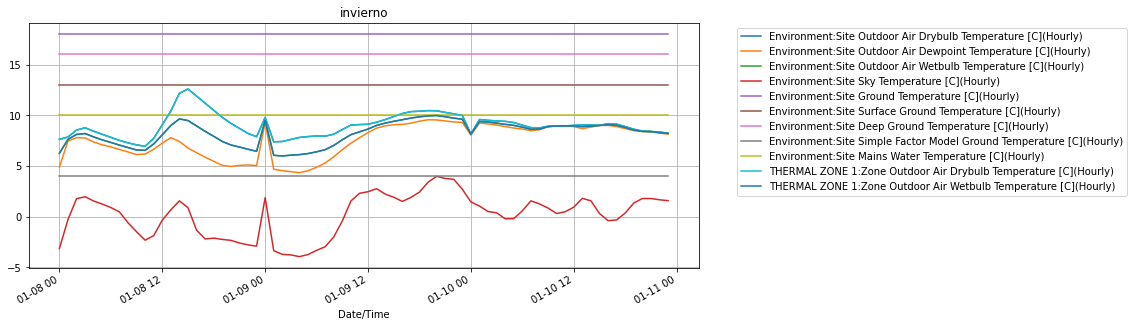

In [22]:
datawinter.plot(title = 'invierno',figsize = (12,5),grid =True).legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))

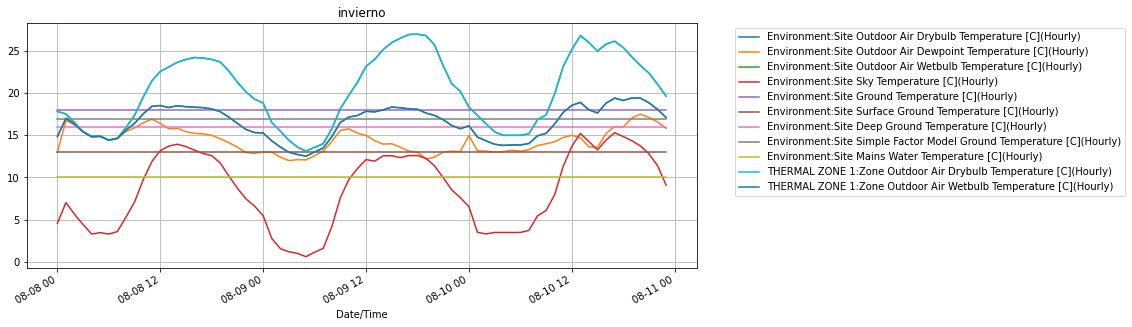

In [23]:
datasummer = data[summerperiod[0]:summerperiod[1]]
datasummer.plot(title = 'invierno',figsize = (12,5),grid =True).legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))

In [24]:
%%bash
cd input/Wheather\ file/FRa¡¡A¡¡¡¡

epExploratory.ipynb
helpers
input
notebooks
Output Variables.ipynb
Output Variables.xlsx
__pycache__
README.md
readvars.audit
schedule_project.py
schedules explorator.ipynb
simpleProject.py
studies
TemoeratureStudyplots.ipynb
TemperatureStudy1
tmp
Variables Study chicago SF prototype.ipynb
Variables Study HVAC system.ipynb
Variables Study No HVAC system.ipynb
Variables Study Outside.ipynb
variable_study
variable_study_CHICAGO
variable_study_outside


In [27]:
weather = pd.read_csv('input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw')

In [29]:
weather

LOCATION  \
DESIGN CONDITIONS         1                                                  Climate Design Data 2009 ASHRAE Handbook         NaN     Heating 1                                            -5.9                                               -3.8    -10.8 1.5    -4.2                                             -7.9    2     -2    14.9                                               9.5     12.9 9    3.3                                                60      Cooling 7     10.1                                               30.9    20.1 28.9 19.50 2.700000e+01 18.70 21.400 28.30 20.50 26.70 19.60 25.3 3.6 100.0 19.2 14.10 23.80 18.20 13.20 22.90 17.30 12.50 22.2 62.60 28.40 59.20 26.90 56.1 25.2 1088.0 Extremes 11.0 9.5 8.4 25.4 -8.0 34.2       3.2   
TYPICAL/EXTREME PERIODS   6                                                  Summer - Week Nearest Max Temperature For Period Extreme 8/19    8/25                                         Summer - Week Nearest Average Temperature For P... Typical 8/26  9/ 1   Winter - Week Nearest Min Temperature For Period Extreme 1/22  1/28  Winter - Week Nearest Average Temperature For P... Typical 1/ 1 1/ 7 Autumn - Week Nearest Average Temperature For P... Typical 12/17   12/23 Spring - Week Nearest Average Temperature For P... Typical 5/ 6 5/12 NaN   NaN          NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  NaN  NaN    NaN      NaN  NaN NaN NaN  NaN  NaN        NaN   
GROUND TEMPERATURES       3                                                  .5                                               NaN     NaN     NaN                                          3.98                                               5.32    7.94  10.41  15.09                                            17.56   18.24 16.99 14.10                                              10.50   6.96 4.62 2                                                  NaN     NaN     NaN   5.83                                               6.16    7.65 9.31 12.91 1.521000e+01 16.35 16.090 14.45 11.96 9.17  6.97  4.0  NaN NaN   NaN  7.74  7.51  8.16  9.11  11.48 13.27 14.42 14.7 13.98 12.52 10.62 8.91  NaN  NaN  NaN    NaN      NaN  NaN NaN NaN  NaN  NaN        NaN   
HOLIDAYS/DAYLIGHT SAVINGS No                                                 0                                                0       0       NaN                                          NaN                                                NaN     NaN   NaN    NaN                                              NaN     NaN   NaN   NaN                                                NaN     NaN  NaN  NaN                                                NaN     NaN     NaN   NaN                                                NaN     NaN  NaN  NaN   NaN          NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  NaN  NaN    NaN      NaN  NaN NaN NaN  NaN  NaN        NaN   
COMMENTS 1                IWEC- WMO#071490 - Europe -- Original Source Da... NaN                                              NaN     NaN     NaN                                          NaN                                                NaN     NaN   NaN    NaN                                              NaN     NaN   NaN   NaN                                                NaN     NaN  NaN  NaN                                                NaN     NaN     NaN   NaN                                                NaN     NaN  NaN  NaN   NaN          NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  NaN  NaN    NaN      NaN  NaN NaN NaN  NaN  NaN        NaN   
...                                                                                                                                                                                                                            